# PRESELECCIÓN DE VARIABLES

## IMPORTAR PAQUETES

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [17]:
ruta_proyecto = 'E:/alex/03_MACHINE_LEARNING/CASOS/02_RETAIL'

Nombres de los ficheros de datos.

In [18]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [19]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [20]:
df

,date,store_id,item_id,year_2013,year_2014,year_2015,month_1,month_2,month_3,month_4,...,ventas_maxm_6,ventas_maxm_7,ventas_maxm_8,ventas_maxm_9,ventas_maxm_10,ventas_maxm_11,ventas_maxm_12,ventas_maxm_13,ventas_maxm_14,ventas_maxm_15
0,2013-01-16,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,2013-01-17,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,2013-01-18,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,2013-01-19,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,2013-01-20,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,2015-11-26,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0,17.0
20976,2015-11-27,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,2015-11-28,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,2015-11-29,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


## MÉTODOS SUPERVISADOS

### Preparar x e y

In [21]:
target = 'ventas'
x = df.drop(columns = ['date','store_id','item_id','ventas']).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

In [25]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,35))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

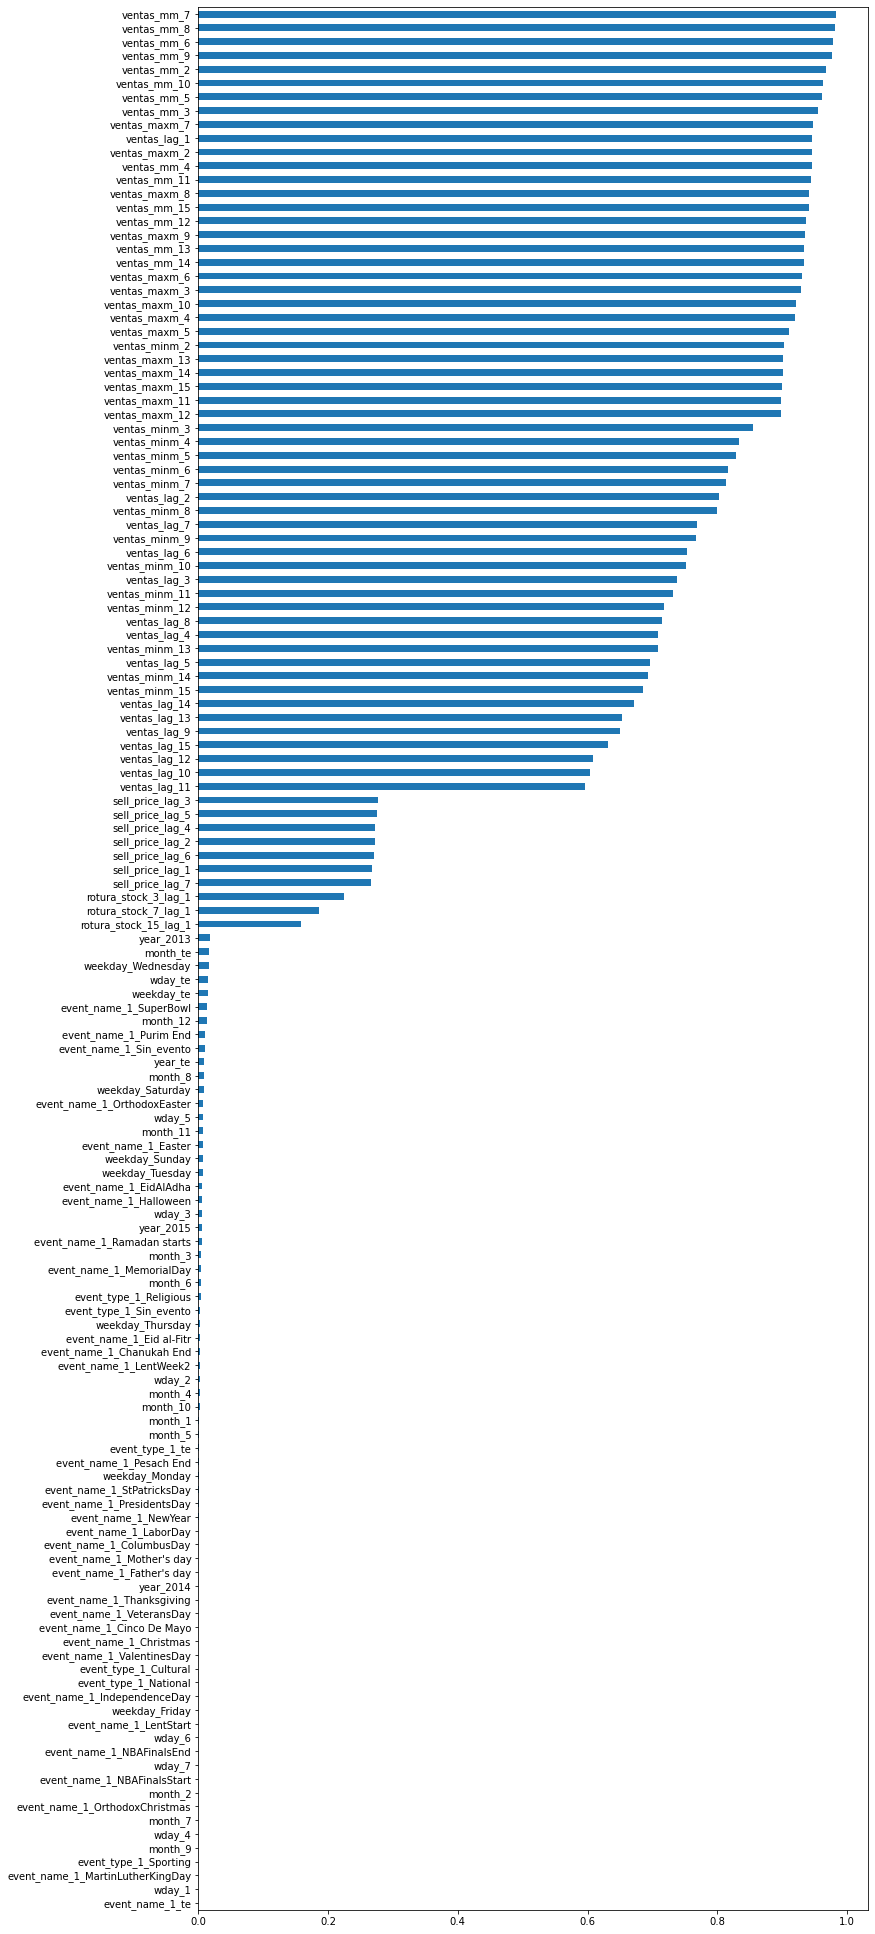

In [26]:
mutual_selector = mutual_info_regression(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

Miramos la posición del year2014.

In [27]:
ranking_mi(mutual_selector).reset_index().iloc[60:100]

,index,variable,importancia_mi,ranking_mi
60,72,sell_price_lag_2,0.272672,60
61,76,sell_price_lag_6,0.270741,61
62,71,sell_price_lag_1,0.268388,62
63,77,sell_price_lag_7,0.265416,63
64,78,rotura_stock_3_lag_1,0.224471,64
65,79,rotura_stock_7_lag_1,0.186171,65
66,80,rotura_stock_15_lag_1,0.158987,66
67,0,year_2013,0.017479,67
68,66,month_te,0.016645,68
69,28,weekday_Wednesday,0.015924,69


In [28]:
posicion_variable_limite = 72

##### Extraer los nombres de las que entran

In [29]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [30]:
x_mi = x[entran_mi].copy()

### Recursive Feature Elimination

#### Instanciar

In [43]:
rfe = RFE(estimator = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric='mae'))

#### Entrenar

In [44]:
rfe.fit(x,y)

RFE(estimator=XGBRegressor(base_score=None, booster=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, enable_categorical=False,
                           eval_metric='mae', gamma=None, gpu_id=None,
                           importance_type=None, interaction_constraints=None,
                           learning_rate=None, max_delta_step=None,
                           max_depth=None, min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=-1, num_parallel_tree=None, predictor=None,
                           random_state=None, reg_alpha=None, reg_lambda=None,
                           scale_pos_weight=None, subsample=None,
                           tree_method=None, use_label_encoder=False,
                           validate_parameters=None, verbosity=None))

##### Extraer los nombres de las que entran

In [45]:
entran_rfe = x.columns[rfe.support_]

#### Crear el dataframe con la selección

In [46]:
x_rfe = x[entran_rfe].copy()

In [47]:
x_rfe

,year_2013,month_2,month_3,month_11,month_12,wday_1,wday_2,wday_4,event_name_1_Christmas,event_name_1_SuperBowl,...,ventas_maxm_5,ventas_maxm_6,ventas_maxm_7,ventas_maxm_8,ventas_maxm_9,ventas_maxm_10,ventas_maxm_11,ventas_maxm_13,ventas_maxm_14,ventas_maxm_15
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,224.0,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0
20976,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


### Permutation Importance

#### Crear una función para mostrar el resultado

In [48]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [49]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric='mae')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'neg_mean_absolute_percentage_error',
                                     n_repeats=3, n_jobs = -1)

C:\Users\isaac\miniconda3\envs\retail\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


#### Revisar la salida

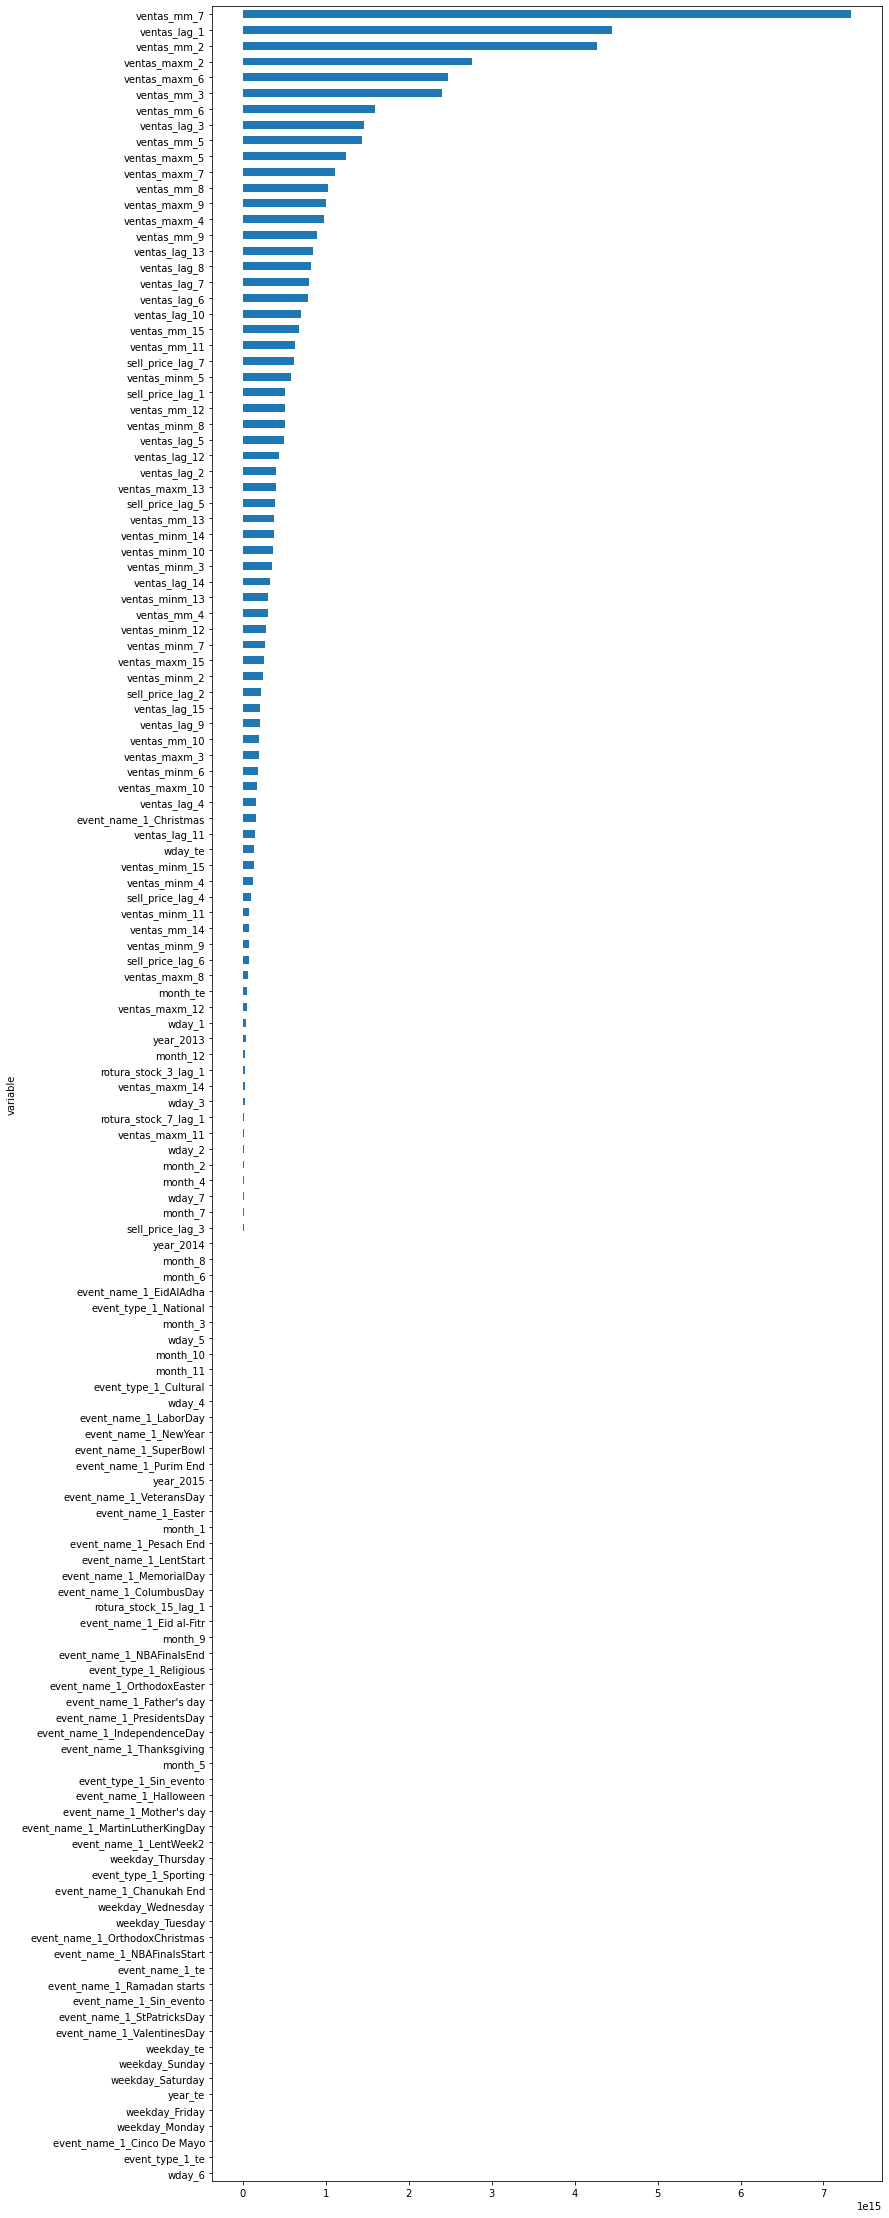

In [50]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,40));

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

Revisar la posición de wday3.

In [51]:
rank_per.reset_index().iloc[50:100]

,index,variable,importancia_per,ranking_per
50,84,ventas_lag_4,1.628127e+14,50
51,30,event_name_1_Christmas,1.594072e+14,51
52,91,ventas_lag_11,1.448014e+14,52
53,67,wday_te,1.306858e+14,53
54,109,ventas_minm_15,1.288004e+14,54
55,98,ventas_minm_4,1.259464e+14,55
56,74,sell_price_lag_4,9.425293e+13,56
57,105,ventas_minm_11,7.617801e+13,57
58,122,ventas_mm_14,7.546715e+13,58
59,103,ventas_minm_9,7.159433e+13,59


In [52]:
posicion_variable_limite = 69

##### Extraer los nombres de las que entran

In [53]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [54]:
x_per = x[entran_per].copy()

## SELECCIONAR EL MÉTODO FINAL

In [31]:
x_preseleccionado = x_mi
#x_preseleccionado = x_rfe
#x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

En este caso no hacemos, ya que ya son muchas variables y vamos a modelizar con algoritmos de árboles.

## INCORPORACION DE VARIABLES DE SEGMENTACION

Vamos a añadir las variables de segmentación que también necesitaremos.

In [32]:
x_preseleccionado = pd.concat([df[['date','store_id','item_id']], x_preseleccionado], axis=1)

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [33]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [34]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [35]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)